In [10]:
import json
import networkx as nx
import os
from rdflib import Graph
from collections import defaultdict, Counter


In [74]:
# Initialize an empty graph
G = nx.Graph()

# categories = defaultdict(list)
def get_triples(folder_path):
# Read and parse each JSON file
    triples = []
    for filename in os.listdir(folder_path):
        
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                data = json.load(f)
                for triple in data:
                    subject = triple['subject']
                    predicate = triple['predicate']
                    object = triple['object']
                    
                    triples.append((subject, predicate, object))
                    # categories[category].append(triple)
                    G.add_edge(subject, object, label=predicate)
        return triples

# print("Loaded and parsed RDF triples from JSON files.")

[('http://dbpedia.org/ontology/wikiPageWikiLink', 40), ('http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 33), ('http://purl.org/dc/terms/subject', 13), ('http://www.w3.org/2000/01/rdf-schema#label', 3), ('http://www.w3.org/2000/01/rdf-schema#comment', 3), ('http://xmlns.com/foaf/0.1/name', 1), ('http://dbpedia.org/property/name', 1), ('http://xmlns.com/foaf/0.1/depiction', 1), ('http://dbpedia.org/ontology/birthPlace', 1), ('http://dbpedia.org/property/birthPlace', 1), ('http://dbpedia.org/ontology/birthDate', 1), ('http://dbpedia.org/ontology/wikiPageID', 1), ('http://dbpedia.org/ontology/wikiPageRevisionID', 1)]


In [79]:
# Computer scientists
folder_path_cs = 'computers_rdf'
triples = get_triples(folder_path_cs)
properties_cs = [p for s, p, o in triples]


property_counts_cs = Counter(properties_cs)
top_50_properties_cs = property_counts_cs.most_common(50)
print(top_50_properties_cs)

[('http://dbpedia.org/ontology/wikiPageWikiLink', 40), ('http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 33), ('http://purl.org/dc/terms/subject', 13), ('http://www.w3.org/2000/01/rdf-schema#label', 3), ('http://www.w3.org/2000/01/rdf-schema#comment', 3), ('http://xmlns.com/foaf/0.1/name', 1), ('http://dbpedia.org/property/name', 1), ('http://xmlns.com/foaf/0.1/depiction', 1), ('http://dbpedia.org/ontology/birthPlace', 1), ('http://dbpedia.org/property/birthPlace', 1), ('http://dbpedia.org/ontology/birthDate', 1), ('http://dbpedia.org/ontology/wikiPageID', 1), ('http://dbpedia.org/ontology/wikiPageRevisionID', 1)]


In [106]:
# Sculptors
folder_path_sculptors = 'sculptors_rdf'
triples = get_triples(folder_path_sculptors)
properties_sculptors = [p for s, p, o in triples]


property_counts_sculptors = Counter(properties_sculptors)
top_50_properties_sculptors = property_counts_sculptors.most_common(50)
print(top_50_properties_sculptors)

[('http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 14), ('http://dbpedia.org/ontology/wikiPageWikiLink', 10), ('http://dbpedia.org/property/wikiPageUsesTemplate', 6), ('http://purl.org/dc/terms/subject', 5), ('http://www.w3.org/2002/07/owl#sameAs', 4), ('http://dbpedia.org/ontology/birthPlace', 2), ('http://dbpedia.org/property/birthPlace', 2), ('http://www.w3.org/2000/01/rdf-schema#label', 1), ('http://www.w3.org/2000/01/rdf-schema#comment', 1), ('http://xmlns.com/foaf/0.1/name', 1), ('http://dbpedia.org/property/name', 1), ('http://dbpedia.org/ontology/birthDate', 1), ('http://dbpedia.org/ontology/wikiPageID', 1), ('http://dbpedia.org/ontology/wikiPageRevisionID', 1), ('http://dbpedia.org/property/birthDate', 1), ('http://dbpedia.org/property/knownFor', 1), ('http://dbpedia.org/ontology/abstract', 1), ('http://www.w3.org/ns/prov#wasDerivedFrom', 1), ('http://dbpedia.org/ontology/wikiPageLength', 1), ('http://xmlns.com/foaf/0.1/isPrimaryTopicOf', 1)]


In [81]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [123]:
def plot_wordcloud(property_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(property_counts)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return wordcloud

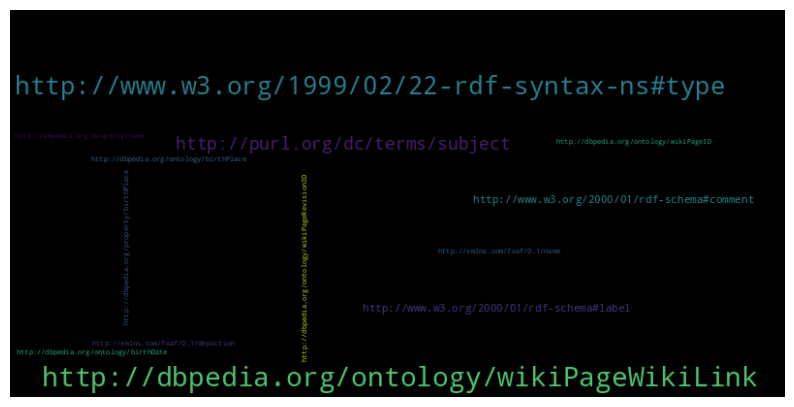

In [122]:
plot_wordcloud(property_counts_cs)

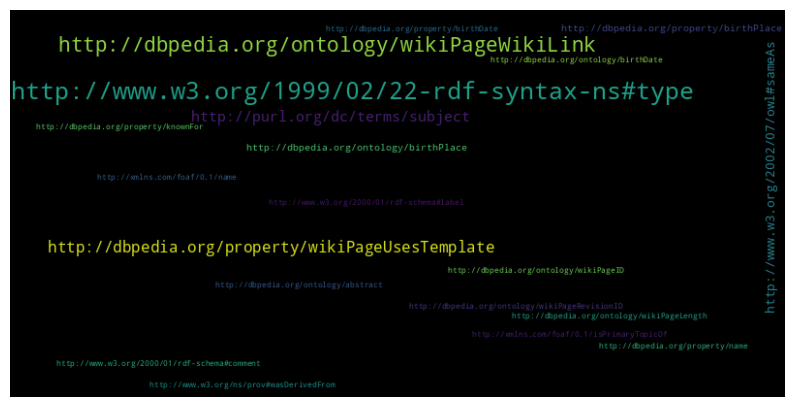

In [124]:
plot_wordcloud(property_counts_sculptors)

In [43]:
import seaborn as sns
import pandas as pd

In [125]:
facts_per_graph = []
# facts_per_category = []
facts = []

# Calculate facts per graph
def plots(path, prop):
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            file_path = os.path.join(path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                num_facts = len(data)  

                # category = data['category']
                facts.append((data, num_facts))
     # Convert to DataFrame 
    df_facts = pd.DataFrame(facts, columns=['property', 'num_facts'])
    # Calculate statistics
    min_facts = df_facts['num_facts'].min()
    max_facts = df_facts['num_facts'].max()
    avg_facts = df_facts['num_facts'].mean()

    print(f"Min facts: {min_facts}")
    print(f"Max facts: {max_facts}")
    print(f"Avg facts: {avg_facts:.2f}")

    # Create histograms
    plt.figure(figsize=(12, 6))
    sns.histplot(df_facts['num_facts'])
    plt.title('Histogram of Number of Facts')
    plt.xlabel('Number of Facts')
    plt.ylabel('Frequency')
    plt.savefig(f'hist_{path}.png')
    plt.show()

    # Create box plots
    plt.figure(figsize=(12, 6))
    sns.boxplot(df_facts['num_facts'])
    plt.title('Box Plot of Number of Facts ')
    plt.xlabel('Category')
    plt.ylabel('Number of Facts')
    plt.xticks(rotation=90)
    plt.savefig(f'box_{path}.png')
    plt.show()
    return df_facts


Min facts: 8
Max facts: 100
Avg facts: 89.91


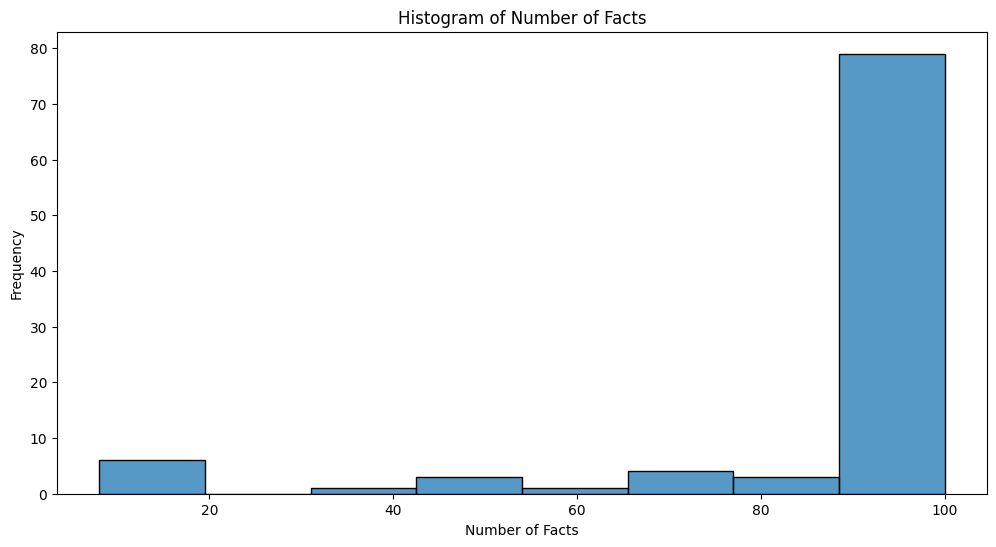

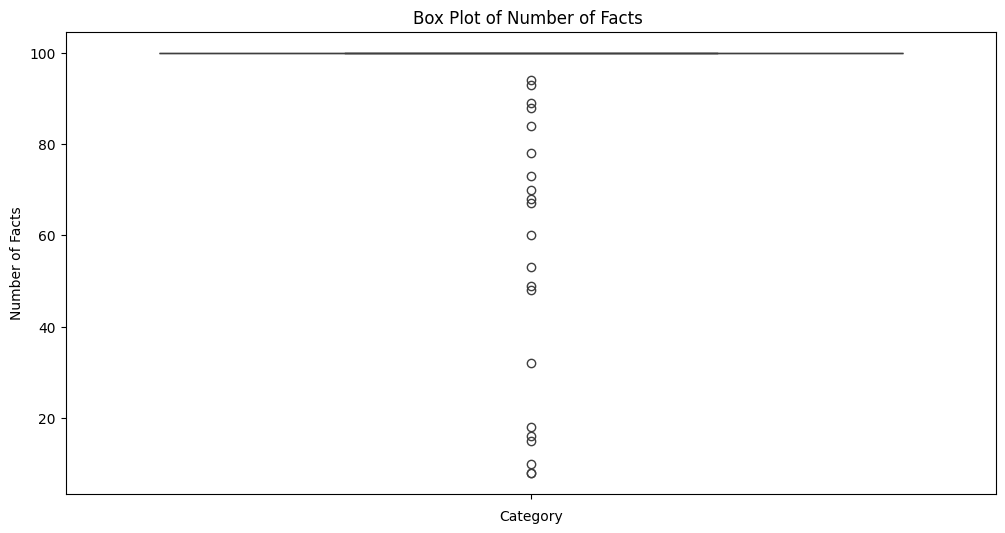

                                             property  num_facts
0   [{'subject': 'http://dbpedia.org/resource/Anth...        100
1   [{'subject': 'http://dbpedia.org/resource/Lenn...         89
2   [{'subject': 'http://dbpedia.org/resource/Andr...         18
3   [{'subject': 'http://dbpedia.org/resource/Trac...        100
4   [{'subject': 'http://dbpedia.org/resource/Rod_...        100
..                                                ...        ...
92  [{'subject': 'http://dbpedia.org/resource/Dani...        100
93  [{'subject': 'http://dbpedia.org/resource/Mart...        100
94  [{'subject': 'http://dbpedia.org/resource/Edmu...        100
95  [{'subject': 'http://dbpedia.org/resource/Greg...        100
96  [{'subject': 'http://dbpedia.org/resource/Jeff...        100

[97 rows x 2 columns]


In [126]:
# Computer scientists
hist_rdf_cs = plots(folder_path_cs, 'computer scientists')
print(hist_rdf_cs)

Min facts: 8
Max facts: 100
Avg facts: 86.74


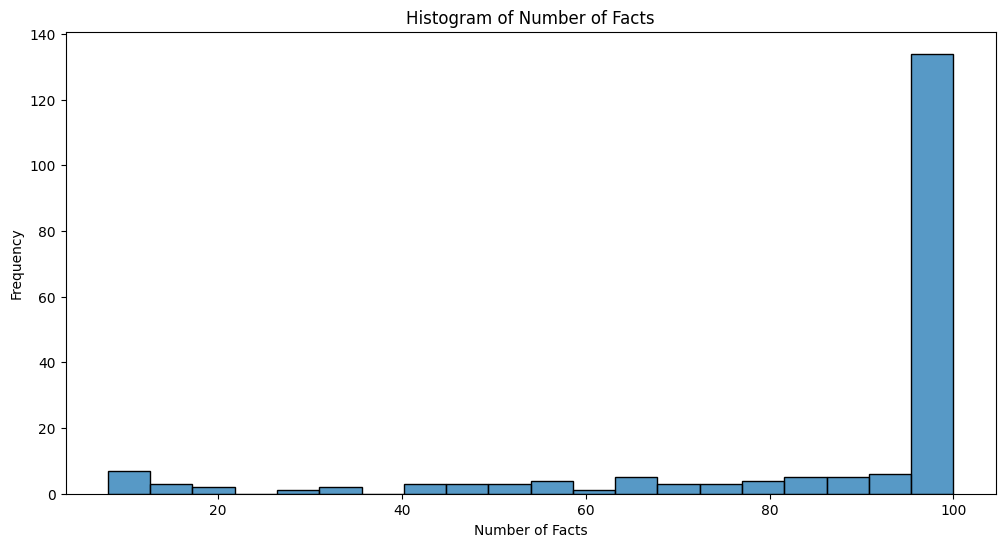

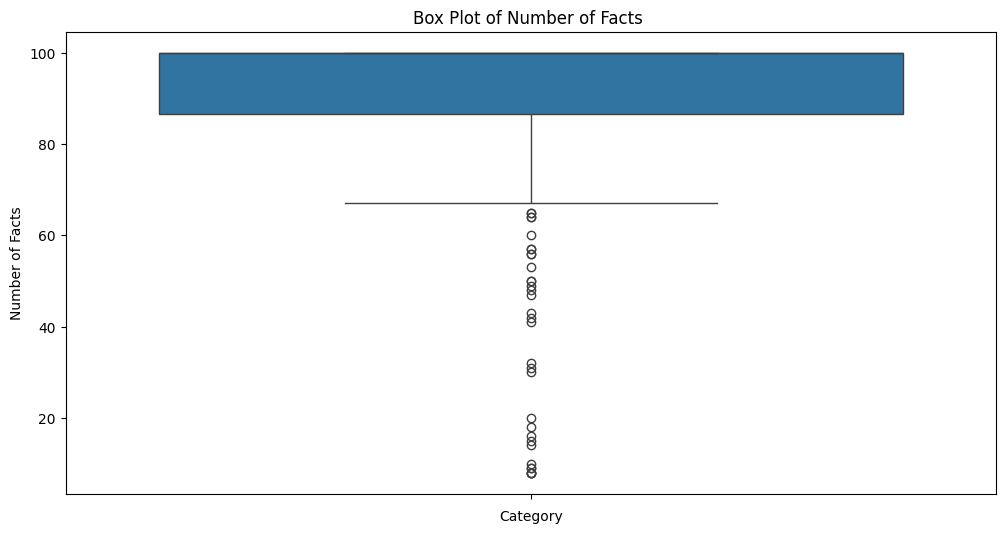

,property,num_facts
0,[{'subject': 'http://dbpedia.org/resource/Anth...,100
1,[{'subject': 'http://dbpedia.org/resource/Lenn...,89
2,[{'subject': 'http://dbpedia.org/resource/Andr...,18
3,[{'subject': 'http://dbpedia.org/resource/Trac...,100
4,[{'subject': 'http://dbpedia.org/resource/Rod_...,100
...,...,...
189,[{'subject': 'http://dbpedia.org/resource/Isa_...,42
190,[{'subject': 'http://dbpedia.org/resource/John...,100
191,[{'subject': 'http://dbpedia.org/resource/Joha...,100
192,[{'subject': 'http://dbpedia.org/resource/Nico...,100


In [127]:
# Sculptors
df_facts_sculptors = plots(folder_path_sculptors, 'sculptors')
df_facts_sculptors